In [1]:
import numpy as np
import tensorflow as tf
import csv
import warnings

In [2]:
obj = csv.reader(open("train_x.csv", 'r'))
DATA = np.array(list(obj))
print(DATA.shape)

(77159, 42)


In [3]:
summary, PrecipType, others = set(), set(), set()
for i, data in enumerate(DATA):
	if i == 0: continue
	for j, entry in enumerate(data):
		if j % 7 == 0: summary.add(entry)
		elif j % 7 == 1: PrecipType.add(entry)
		elif(entry.replace('.', '', 1).replace('-', '', 1).isdigit() == False): others.add(entry)

print(len(summary), len(PrecipType), len(others))
print(summary)
print(PrecipType)
print(others)

26 3 0
{'Windy and Mostly Cloudy', 'Windy and Dry', 'Breezy and Mostly Cloudy', 'Dry', 'Breezy and Overcast', 'Foggy', 'Light Rain', 'Partly Cloudy', 'Breezy', 'Drizzle', 'Breezy and Foggy', 'Overcast', 'Humid and Partly Cloudy', 'Humid and Overcast', 'Windy', 'Breezy and Dry', 'Windy and Overcast', 'Windy and Foggy', 'Windy and Partly Cloudy', 'Dry and Partly Cloudy', 'Mostly Cloudy', 'Clear', 'Rain', 'Humid and Mostly Cloudy', 'Dry and Mostly Cloudy', 'Breezy and Partly Cloudy'}
{'', 'snow', 'rain'}
set()


In [4]:
summarydict, precipdict, code = {}, {}, -1
for i in summary:
	code += 1
	summarydict[i] = code
code = -1
for i in PrecipType:
	code += 1
	precipdict[i] = code

print(summarydict)
print(precipdict)

{'Windy and Mostly Cloudy': 0, 'Windy and Dry': 1, 'Breezy and Mostly Cloudy': 2, 'Dry': 3, 'Breezy and Overcast': 4, 'Foggy': 5, 'Light Rain': 6, 'Partly Cloudy': 7, 'Breezy': 8, 'Drizzle': 9, 'Breezy and Foggy': 10, 'Overcast': 11, 'Humid and Partly Cloudy': 12, 'Humid and Overcast': 13, 'Windy': 14, 'Breezy and Dry': 15, 'Windy and Overcast': 16, 'Windy and Foggy': 17, 'Windy and Partly Cloudy': 18, 'Dry and Partly Cloudy': 19, 'Mostly Cloudy': 20, 'Clear': 21, 'Rain': 22, 'Humid and Mostly Cloudy': 23, 'Dry and Mostly Cloudy': 24, 'Breezy and Partly Cloudy': 25}
{'': 0, 'snow': 1, 'rain': 2}


In [5]:
for i, data in enumerate(DATA):
	if i == 0: continue
	for j, entry in enumerate(data):
		if j % 7 == 0: DATA[i, j] = summarydict[entry]
		elif j % 7 == 1: DATA[i, j] = precipdict[entry]
		else: DATA[i, j] = float(entry)
for i in range(1, 6):
	print(DATA[i])

['7' '2' '0.81' '12.5824788' '12.2910788' '16.1' '1078.20203' '7' '2'
 '0.81' '14.96170673' '10.36800673' '15.1823' '1076.404755' '20' '2'
 '0.78' '16.00149984' '20.47399984' '16.1' '1073.641957' '20' '2' '0.76'
 '20.51836004' '12.65996004' '16.1' '1069.355043' '20' '2' '0.76'
 '15.34198778' '21.71608778' '15.1823' '1066.629513' '20' '2' '0.73'
 '16.08486754' '21.78276754' '16.1' '1062.069436']
['21' '1' '0.92' '10.90564455' '91.41564455' '0.0' '1066.585351' '11' '1'
 '0.92' '9.217695643' '91.33769564' '7.084' '1071.749572' '11' '1' '0.92'
 '8.975897217' '96.27299722' '5.6672' '1075.98286' '11' '1' '0.92'
 '5.8033605' '101.1433605' '11.27' '1080.726572' '11' '1' '0.92'
 '5.674115651' '91.01411565' '11.27' '1084.65279' '11' '1' '0.89'
 '2.510762909' '69.78096291' '13.9587' '1088.381365']
['16' '2' '0.93' '42.30259895' '317.376399' '4.1699' '1072.214882' '20'
 '2' '0.93' '11.60751674' '145.0459167' '9.8371' '1081.546168' '20' '2'
 '0.91' '13.59639534' '154.6036953' '15.4399' '1086.334843

In [6]:
train_x, dev_x, test_x = DATA[1:53900].astype(float), DATA[53900:65540].astype(float), DATA[65540:].astype(float)
RFtrain_x, RFtest_x = DATA[1:65000].astype(float), DATA[65000:].astype(float)
print(train_x.shape, dev_x.shape, test_x.shape)
for i in range(5):
	print(train_x[i])

(53899, 42) (11640, 42) (11619, 42)
[7.00000000e+00 2.00000000e+00 8.10000000e-01 1.25824788e+01
 1.22910788e+01 1.61000000e+01 1.07820203e+03 7.00000000e+00
 2.00000000e+00 8.10000000e-01 1.49617067e+01 1.03680067e+01
 1.51823000e+01 1.07640476e+03 2.00000000e+01 2.00000000e+00
 7.80000000e-01 1.60014998e+01 2.04739998e+01 1.61000000e+01
 1.07364196e+03 2.00000000e+01 2.00000000e+00 7.60000000e-01
 2.05183600e+01 1.26599600e+01 1.61000000e+01 1.06935504e+03
 2.00000000e+01 2.00000000e+00 7.60000000e-01 1.53419878e+01
 2.17160878e+01 1.51823000e+01 1.06662951e+03 2.00000000e+01
 2.00000000e+00 7.30000000e-01 1.60848675e+01 2.17827675e+01
 1.61000000e+01 1.06206944e+03]
[2.10000000e+01 1.00000000e+00 9.20000000e-01 1.09056445e+01
 9.14156445e+01 0.00000000e+00 1.06658535e+03 1.10000000e+01
 1.00000000e+00 9.20000000e-01 9.21769564e+00 9.13376956e+01
 7.08400000e+00 1.07174957e+03 1.10000000e+01 1.00000000e+00
 9.20000000e-01 8.97589722e+00 9.62729972e+01 5.66720000e+00
 1.07598286e+03 1

In [7]:
warnings.filterwarnings('ignore')
obj = csv.reader(open("train_y.csv", 'r'))
DATA = list(obj)
print(len(DATA))
for i in range(1, 6):
	print(DATA[i])

77159
['4.583333333']
['0']
['9.955555556']
['25.09444444']
['3.816666667']


In [8]:
train, dev, test = DATA[1:53900], DATA[53900:65540], DATA[65540:]
RFtrain, RFtest = DATA[1:65000], DATA[65000:]
train_y, dev_y, test_y = np.zeros(len(train)), np.zeros(len(dev)), np.zeros(len(test))
RFtrain_y, RFtest_y = np.zeros(len(RFtrain)), np.zeros(len(RFtest))
for i in range(len(train)):
	try: train_y[i] = float(train[i][0]) 
	except: train_y[i] = 0.0
for i in range(len(dev)):
	try: dev_y[i] = float(dev[i][0]) 
	except: dev_y[i] = 0.0
for i in range(len(test)):
	try: test_y[i] = float(test[i][0]) 
	except: test_y[i] = 0.0
for i in range(len(RFtrain)):
	try: RFtrain_y[i] = float(RFtrain[i][0]) 
	except: RFtrain_y[i] = 0.0
for i in range(len(RFtest)):
	try: RFtest_y[i] = float(RFtest[i][0]) 
	except: RFtest_y[i] = 0.0

for i in range(5):
	print(train_y[i])

4.583333333
0.0
9.955555556
25.09444444
3.816666667


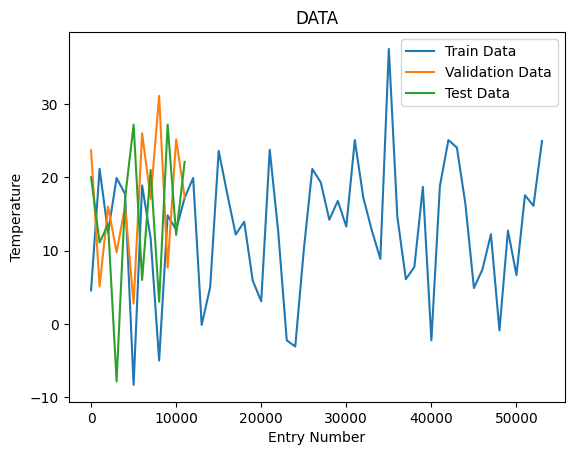

In [9]:
import matplotlib.pyplot as plt

step_size = 1000
plt.plot(range(0, len(train_y), step_size), train_y[::step_size], label = 'Train Data')
plt.plot(range(0, len(dev_y), step_size), dev_y[::step_size], label = 'Validation Data')
plt.plot(range(0, len(test_y), step_size), test_y[::step_size], label = 'Test Data')

plt.xlabel('Entry Number')
plt.ylabel('Temperature')
plt.title('DATA')
plt.legend()

plt.show()

In [37]:
model = tf.keras.Sequential([
	tf.keras.layers.Input(shape = (42,), batch_size = 100),
	tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(1E-3)),
	tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(1E-3)),
	tf.keras.layers.Dense(units = 1, activation = 'linear')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1E-4), loss = tf.keras.losses.MeanSquaredError())

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (100, 128)             │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (100, 64)              │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (100, 1)               │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3969.2837 - val_loss: 97.7297 - learning_rate: 1.0000e-04
Epoch 2/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90.8313 - val_loss: 75.5571 - learning_rate: 1.0000e-04
Epoch 3/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.0839 - val_loss: 69.8129 - learning_rate: 1.0000e-04
Epoch 4/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64.3908 - val_loss: 62.3004 - learning_rate: 1.0000e-04
Epoch 5/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59.1256 - val_loss: 56.8541 - learning_rate: 1.0000e-04
Epoch 6/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.2884 - val_loss: 54.3886 - learning_rate: 1.0000e-04
Epoch 7/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53.0310 - val_loss: 52.6654 - learning_rate: 1.0000e-04
Epoch 8/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52.5503 - val_loss: 50.6796 - learning_rate: 1.0000e-04
Epoch 9/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

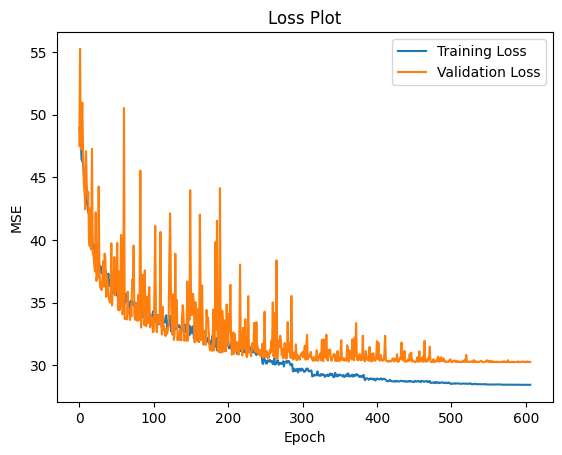

In [38]:
epochs = 1000
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.6, patience = 20, min_lr = 1E-8)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, restore_best_weights = True)
history = model.fit(train_x, train_y, epochs = epochs, batch_size = 100, validation_data = (dev_x, dev_y), callbacks = [reduce_lr, early_stopping])

plt.plot(history.history['loss'][10:], label = 'Training Loss')
plt.plot(history.history['val_loss'][10:], label = 'Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

In [39]:
model.save('./models/Dense2.h5')

In [60]:
model = tf.keras.models.load_model('./models/Dense2.h5')

In [61]:
import pandas as pd

TestResults = model.predict(test_x)
TestResults = TestResults.flatten()

TestLoss = 0
for i in range(test_y.shape[0]):
	TestLoss += (test_y[i] - TestResults[i]) ** 2
TestLoss /= test_y.shape[0]
print("Loss using Dense Layer: ", TestLoss)

TestPred = pd.DataFrame(TestResults)
TestPred.to_csv('./files/TestPred.csv', index = False)
TestTrue = pd.DataFrame(test_y)
TestTrue.to_csv('./files/TestTrue.csv', index = False)

364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loss using Dense Layer:  30.178081524099778


In [42]:
train_x = np.reshape(train_x, (train_x.shape[0], 6, 7))
dev_x = np.reshape(dev_x, (dev_x.shape[0], 6, 7))
test_x = np.reshape(test_x, (test_x.shape[0], 6, 7))

In [14]:
modelLSTM = tf.keras.Sequential([
	tf.keras.Input(shape = (6, 7), batch_size = 100),
	tf.keras.layers.LSTM(units = 256, kernel_regularizer = tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dense(units = 256, kernel_regularizer = tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dense(units = 32, kernel_regularizer = tf.keras.regularizers.l2(0.005)),
	tf.keras.layers.Dense(units = 1, activation = 'linear')
])

modelLSTM.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1E-4), loss = tf.keras.losses.MeanSquaredError())

modelLSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (100, 256)             │       270,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (100, 256)             │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (100, 32)              │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (100, 1)               │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344,385 (1.31 MB)

 Trainable params: 344,385 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 31.8479 - val_loss: 32.9307 - learning_rate: 1.0000e-04
Epoch 2/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 31.3901 - val_loss: 30.0471 - learning_rate: 1.0000e-04
Epoch 3/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 31.9520 - val_loss: 30.0619 - learning_rate: 1.0000e-04
Epoch 4/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 30.9658 - val_loss: 34.8530 - learning_rate: 1.0000e-04
Epoch 5/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 31.3562 - val_loss: 29.9626 - learning_rate: 1.0000e-04
Epoch 6/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 30.1603 - val_loss: 30.0607 - learning_rate: 1.0000e-04
Epoch 7/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 30.0377 - val_loss: 29.9850 - learning_rate: 1.0000e-04
Epoch 8/1000
539/539 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 30.6111 - val_loss: 30.3006 - learning_rate: 1.0000e-04
Epoch 9/1000
539/539 ━━━━━━━━━━━━━━━━━━━

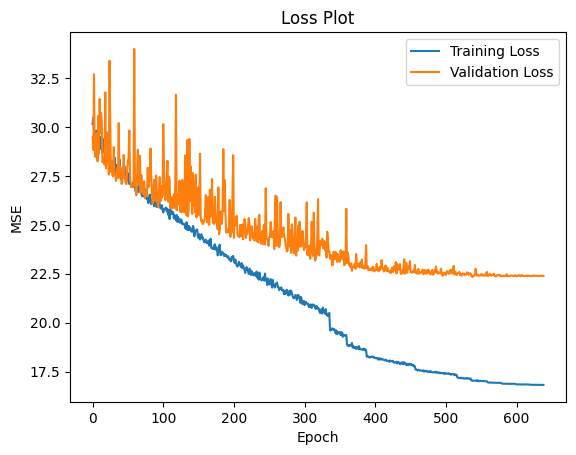

In [16]:
epochs = 1000
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.6, patience = 20, min_lr = 1E-8)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, restore_best_weights = True)
history = modelLSTM.fit(train_x, train_y, epochs = epochs, batch_size = 100, validation_data = (dev_x, dev_y), callbacks = [reduce_lr, early_stopping])

plt.plot(history.history['loss'][10:], label = 'Training Loss')
plt.plot(history.history['val_loss'][10:], label = 'Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

In [17]:
modelLSTM.save('./models/lstm2.h5')

In [49]:
modelLSTM = tf.keras.models.load_model('./models/lstm2.h5')

In [50]:
import pandas as pd

TestResults = modelLSTM.predict(test_x)
TestResults = TestResults.flatten()

TestLoss = 0
for i in range(test_y.shape[0]):
	TestLoss += (test_y[i] - TestResults[i]) ** 2
TestLoss /= test_y.shape[0]
print("Loss in case of LSTM: ", TestLoss)

TestPred = pd.DataFrame(TestResults)
TestPred.to_csv('./files/TestPredLSTM2.csv', index = False)
TestTrue = pd.DataFrame(test_y)
TestTrue.to_csv('./files/TestTrueLSTM2.csv', index = False)

364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Loss in case of LSTM:  22.48493812790066


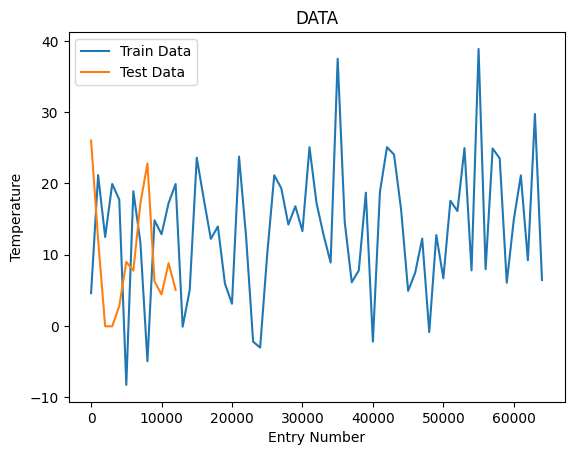

In [20]:
import matplotlib.pyplot as plt

step_size = 1000
plt.plot(range(0, len(RFtrain_y), step_size), RFtrain_y[::step_size], label = 'Train Data')
plt.plot(range(0, len(RFtest_y), step_size), RFtest_y[::step_size], label = 'Test Data')

plt.xlabel('Entry Number')
plt.ylabel('Temperature')
plt.title('DATA')
plt.legend()

plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

model = RandomForestRegressor(n_estimators = 500, random_state = 1)
model.fit(RFtrain_x, RFtrain_y)
joblib.dump(model, './models/RF2.pkl')

In [45]:
model = joblib.load('./models/RF2.pkl')
pred = model.predict(RFtest_x)
print("Mean Squared Error: %f" %(mean_squared_error(RFtest_y, pred)))

Mean Squared Error: 19.826507


In [46]:
import pandas as pd

TestResults = model.predict(RFtest_x)
TestResults = TestResults.flatten()

TestLoss = 0
for i in range(RFtest_y.shape[0]):
	TestLoss += (RFtest_y[i] - TestResults[i]) ** 2
TestLoss /= RFtest_y.shape[0]
print("Loss in case of RandomForestRegressor: ", TestLoss)

TestPred = pd.DataFrame(TestResults)
TestPred.to_csv('./files/TestPredRF2.csv', index = False)
TestTrue = pd.DataFrame(RFtest_y)
TestTrue.to_csv('./files/TestPredRF2.csv', index = False)

Loss in case of RandomForestRegressor:  19.826507059016656


In [23]:
import xgboost as xgb

model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 1)
model.fit(RFtrain_x, RFtrain_y)
joblib.dump(model, './models/XGB2.pkl')

In [47]:
model = joblib.load('./models/XGB2.pkl')
pred = model.predict(RFtest_x)
print("Mean Squared Error: %f" %(mean_squared_error(RFtest_y, pred)))

Mean Squared Error: 18.970014


In [48]:
import pandas as pd

TestResults = model.predict(RFtest_x)
TestResults = TestResults.flatten()

TestLoss = 0
for i in range(RFtest_y.shape[0]):
	TestLoss += (RFtest_y[i] - TestResults[i]) ** 2
TestLoss /= RFtest_y.shape[0]
print("Loss in case of XGBRegressor: ", TestLoss)

TestPred = pd.DataFrame(TestResults)
TestPred.to_csv('./files/TestPredXGB2.csv', index = False)
TestTrue = pd.DataFrame(RFtest_y)
TestTrue.to_csv('./files/TestTrueXGB2.csv', index = False)

Loss in case of XGBRegressor:  18.970013665046082


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(RFtrain_x, RFtrain_y)
pred = model.predict(RFtest_x)
print("Mean Squared Error: %f" %(mean_squared_error(RFtest_y, pred)))

Mean Squared Error: 36.369570
